## MidTerm Assignment: notebook 2: Backpropagation (Total 25pts)

### Muhammad  Wajahat  Mirza 

### NetID: mwm356

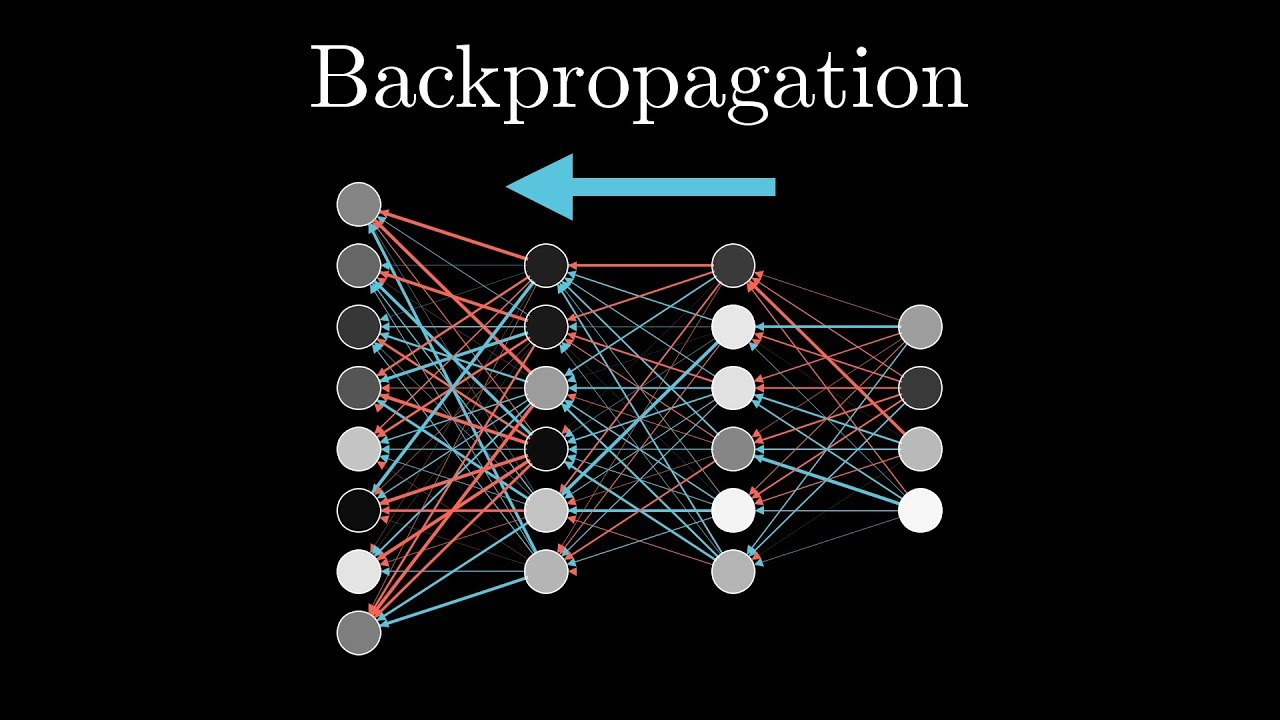

In [501]:
#<img src="backpro.png" width="800" />
from IPython.display import Image
Image('backpro.png')

## Question 1. Training the network through backpropagation (Total 22pts)

In this exercise, you will get to apply what you learned on backpropagation. 
We are interested in learning a classifier for the dataset below. This dataset is similar to what we did in class in the on hidden layer case. The difference is that you now have to learn a neural network with __multiple hidden layers__. We want to train the network through a minimization of the binary cross entropy. We further want to consider an $\ell_2$-regularizarion term on all the weights except the bias, of each neurons. 

Shape of Class 1:  (156, 2)
Shape of Class 2:  (156, 2)


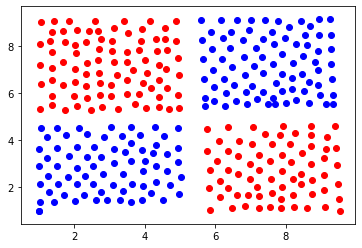

In [450]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

data_class1 = sio.loadmat('Notebook1_Ex1_Class1.mat')
data_class2 = sio.loadmat('Notebook1_Ex1_Class2.mat')

data_class1 = data_class1['Notebook1_Ex1_Class1']
data_class2 = data_class2['Notebook1_Ex1_Class2']

add_value = [[1,1],[1,1]]
data_class2 = np.vstack((data_class2,add_value))

print("Shape of Class 1: ",np.shape(data_class1))
print("Shape of Class 2: ",np.shape(data_class2))

plt.scatter(data_class1[:,0], data_class1[:,1], c = 'r')
plt.scatter(data_class2[:,0], data_class2[:,1], c='b')

plt.show()

# Solution BluePrint 
## This GIF Is the roadmap for Forward and Backward Propagation

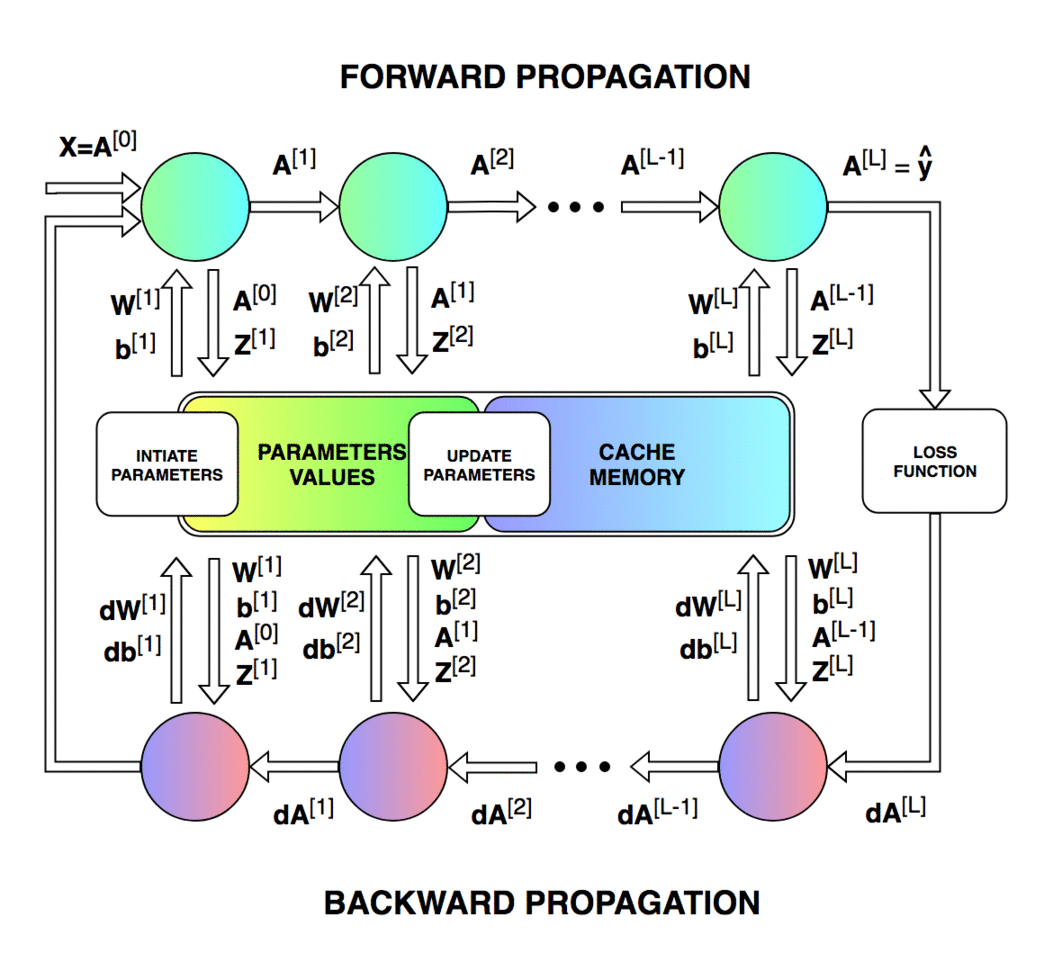

In [502]:
Image('blueprint.gif.png')

## Question 1.1. (3pts) Start by coding the sigmoid activation function and its derivative

# Solution
## 1.1.1 Mathematical Base

1. we define our __Sigmoid Activation Function__ as: 

$$ h_{(\beta)}(z) = \sigma(z) = \sigma(\mathbf{\beta}^T\tilde{\mathbf{x}})  = \frac{\mathrm{1} }{\mathrm{1} + e^{- z}} = \frac{\mathrm{1} }{\mathrm{1} + e^{- \beta^Tx}} $$


2. Take __Derivative__ of our __Sigmoid Activation Function__ as: 
$$  \triangledown (\sigma(z)) = \frac{d}{d(z)}\sigma(z)  = \sigma(z) * (1 - \sigma(z)) $$



Read **[this document](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)** for Detail mathematics of how to find Sigmoid Derivative 
HERE $$ x = z $$


In [503]:
Image('sigmoid_derivative.png')

## 1.1.2 Programming

In [451]:
# ================================================================================================
# Step I : Activation 
# ================================================================================================

''' Activation Function'''
def sigmoid(z):  
    sigmoid  = np.true_divide(1, (1+np.exp(-z)))
    return sigmoid

'''Derivative of the Activation Function'''
def sigmoid_derivative(z): 
    sig_value = sigmoid(z)
    sigmoid_derivative = np.multiply(sig_value, (1 - sig_value))
    
    return sigmoid_derivative

### Extra Work: This is how Sigmoid function and its derivative Graphically looks like

In [452]:
def plot_sigmoid_derivative(z):
    
    A_sigmoid = sigmoid(z)
    A_derivative = sigmoid_derivative(z)

    plt.figure(figsize=(16, 12))
    plt.subplot(2, 2, 1)

    plt.plot(z, A_sigmoid, label="Sigmoid Function")
    plt.plot(z, A_derivative, label = "Derivative") 
    plt.legend(loc="upper left")
    plt.xlabel("z")
    plt.ylabel(r"$\sigma(z)$")
    plt.title("Sigmoid Function", fontsize=16)

    plt.show()

''' Change Input values here'''
z = np.linspace(-10, 10, 100)
plot_sigmoid_derivative(z)

### Initializing the Network Size at the start

In [453]:
'''Our Network has 2 input Neurons, and 1 output Neuron'''
''' Four Hidden Layers'''
'''First Hidden Layer has 15 nodes, second hidden layer 25'''
'''Third Layer has 25 nodes Fourth Layer has nodes 10'''

Network_size = [
    {"input_dim": 2, "output_dim": 15, "activation": "sigmoid"},
    {"input_dim": 15, "output_dim": 25, "activation": "sigmoid"},
    {"input_dim": 25, "output_dim": 25, "activation": "sigmoid"},
    {"input_dim": 25, "output_dim": 10, "activation": "sigmoid"},
    {"input_dim": 10, "output_dim": 1, "activation": "sigmoid"},
]
print("\033[1m"+"\n\t\t\t\tOur Neural Network size {} \n\n{}".format("\033[0m",Network_size))


				Our Neural Network size  

[{'input_dim': 2, 'output_dim': 15, 'activation': 'sigmoid'}, {'input_dim': 15, 'output_dim': 25, 'activation': 'sigmoid'}, {'input_dim': 25, 'output_dim': 25, 'activation': 'sigmoid'}, {'input_dim': 25, 'output_dim': 10, 'activation': 'sigmoid'}, {'input_dim': 10, 'output_dim': 1, 'activation': 'sigmoid'}]


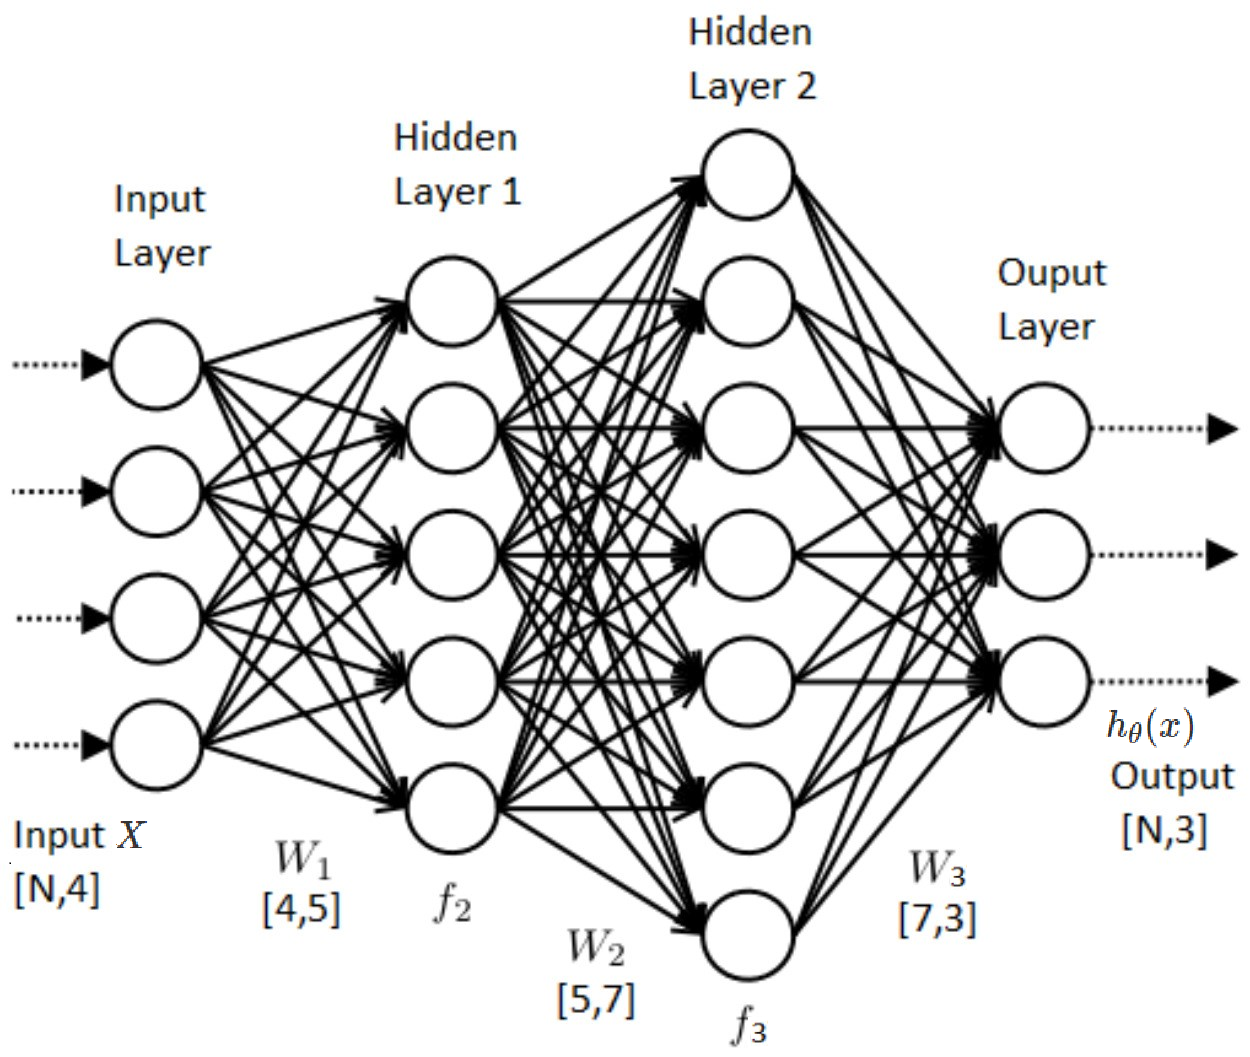

In [504]:
#<img src="NN.png" width="600" />
Image("NN.png")

### Initialize Weights for Each Nodes in Layers

1. Randomly Prepared parameters values are stored in a python dictionary with a key that uniquely identifies to which layer they belong. 
2. The dictionary is returned at the end of the function, so we can use it in the next stages of our Neural Network

In [454]:
def weights_layer(Network_size, seed = 100): 
    np.random.seed(seed)
    num_layers = len(Network_size)
    parameters = {}
    
    for index, layer in enumerate(Network_size):
        layer_index = index + 1 
        '''Num of Units in Layers'''
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        '''Weight matrix and bias vectors'''
        parameters['Weight' + str(layer_index)] = np.random.randn(layer_output_size, layer_input_size) * 0.1
        parameters['bias' + str(layer_index)] = np.random.randn(layer_output_size, 1)*0.1
        
    return parameters


## Question 1.2. (6pts) Code the forward propagation of an input $X$ through a network with weights $W$

# Solution 1.2


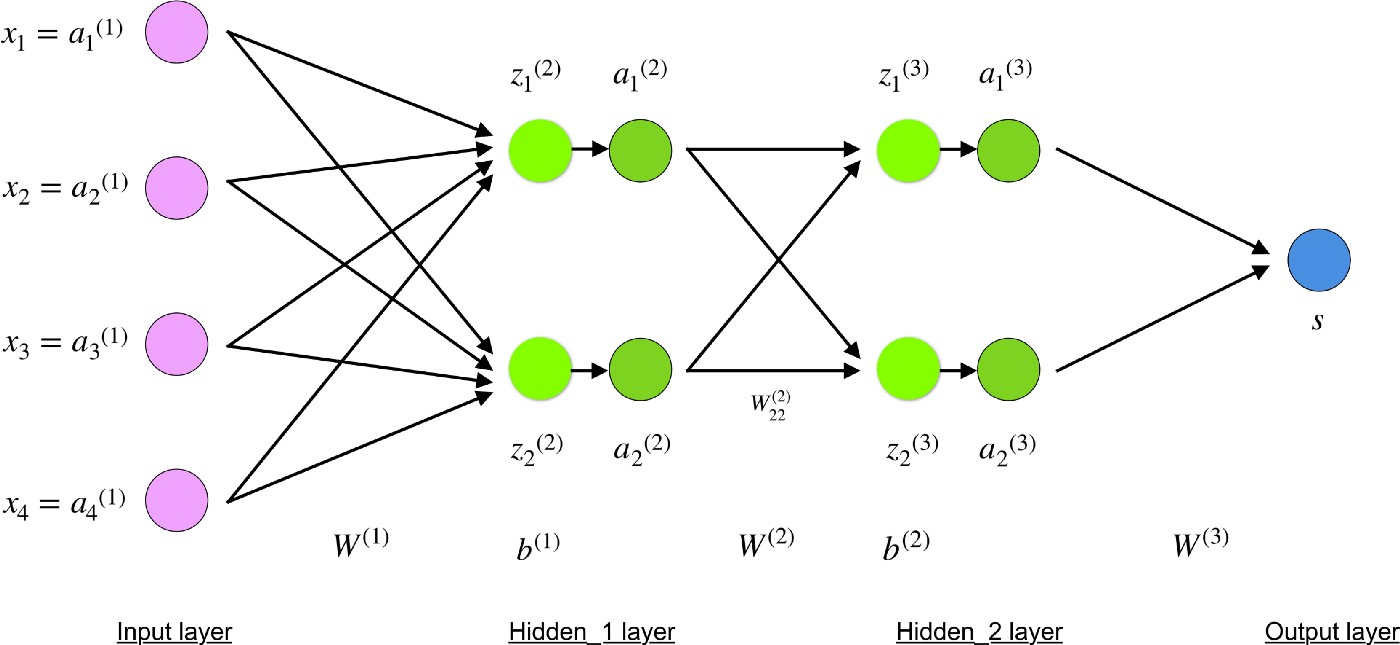

In [505]:
#<img src="neural_network.jpeg" width="600" />
Image("neural_network.png")

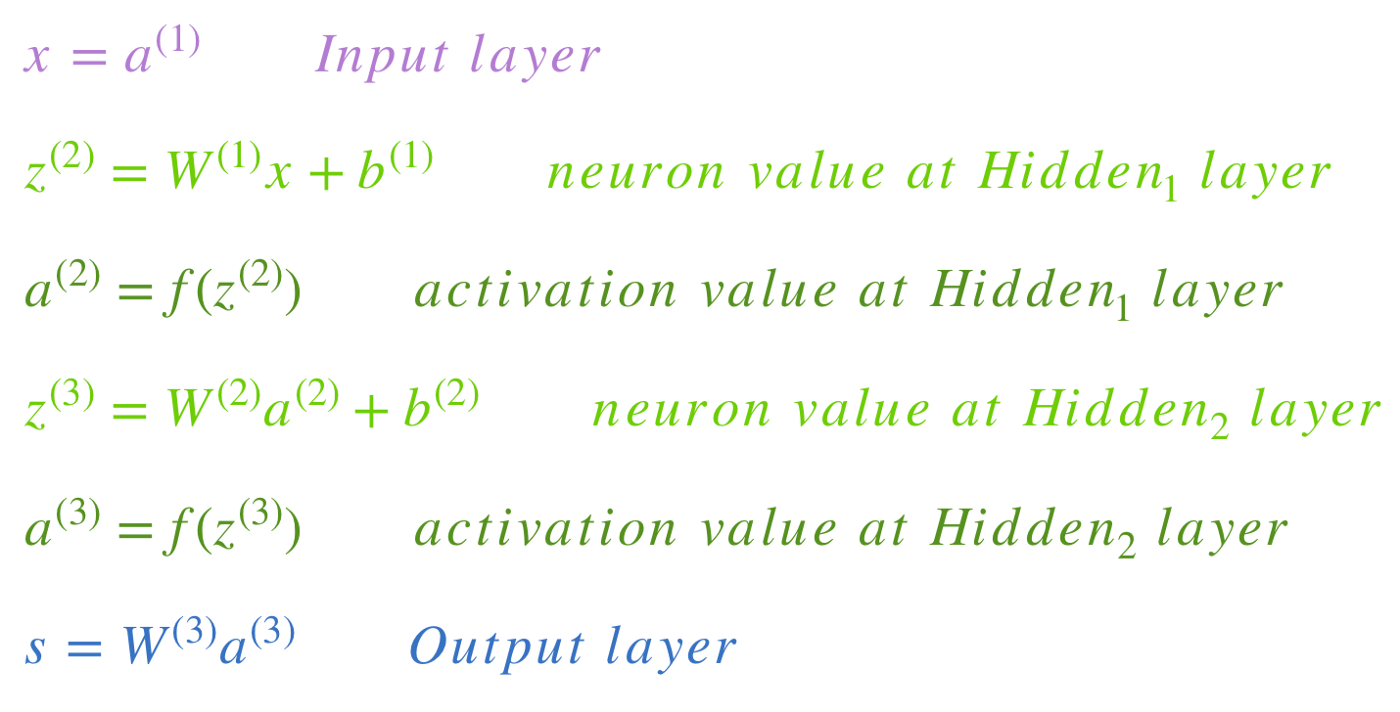

In [506]:
#<img src="forward_propa.png" width="600" />
Image("forward_propa.png")


Read **[this document](https://towardsdatascience.com/forward-propagation-in-neural-networks-simplified-math-and-code-version-bbcfef6f9250)** for mathematics of how to do forward propagation

## Mathematical Base 
1. Calculate $\boldsymbol{Z}^{[l]}$ by following equation:

$$\boldsymbol{Z}^{[l]} = \boldsymbol{W}^{[l]} \cdot \boldsymbol{A}^{[l-1]} + \boldsymbol{b}^{[l]}$$

2. Calculate $\boldsymbol{A}^{[l]}$ by using $\boldsymbol{Z}^{[l]}$ and Sigmoid Activation function

$$\boldsymbol{A}^{[l]} = g^{[l]}(\boldsymbol{Z}^{[l]})$$

3. For multi-layer NN, we have single forward propagation and complete forward propagation. In complete forward propagation, we call our single forward propagation for each node of each layer. This makes it a little easier to compute $\boldsymbol{Z}^{[l]}$ and $\boldsymbol{A}^{[l]}$

## Programming

In [455]:
def simple_forward_propa(prev_Act_vect, weight_curr, bias_curr, activation_curr): 
    
    activ_input = np.dot(weight_curr, prev_Act_vect) + bias_curr
    
    return sigmoid(activ_input), activ_input

In [456]:
# ================================================================================================
# Step II : Forward Propagation
# ================================================================================================

def Forward_propagation_complete(X, parameters, Network_size):
    '''Memory to store information from Backpropagation Store'''
    memory = {}
    X_vect_Act = X 
    
    for index, layer in enumerate(Network_size):
        layer_index = index + 1 # starting index from 1
        prev_Act_vect = X_vect_Act # transforming activation across layers
        
        activation_curr = layer["activation"]
        weight_curr = parameters["Weight" + str(layer_index)]
        bias_curr = parameters["bias" + str(layer_index)]
#         print("activation for layer {} is: {}".format(layer, activation_curr))
        
        X_vect_Act, activ_input = simple_forward_propa(prev_Act_vect, weight_curr, bias_curr, activation_curr)
        
        memory["A" + str(index)] = prev_Act_vect
        memory["Z" + str(layer_index)] = activ_input
    
    predict_vector = X_vect_Act
    print("Shape of Prediction Vector: {} \nMemory dictionary size: {}".format(predict_vector.shape, len(memory)))
    print("Prediction Vector is: \n{}".format(predict_vector))
    return predict_vector, memory

## Question 1.3. (9pts) code the log-loss and its derivative through backpropagation

#  Solution 

## I.3.1 Mathematical Base

## __LogLoss Function__

**Our Goal is:**  $ 0  \leq h_\beta (x)  \leq 1 $
 
Previously, we have defined our __Sigmoid Function as: 

$$ h_{(\beta)}(x) = \sigma(\mathbf{\beta}^T\tilde{\mathbf{x}}) = \frac{\mathrm{1} }{\mathrm{1} + e^{- \beta^Tx}} $$

Assign __discrete value__ of $ 0 $  or $1$ to our dataset:

$$ h_\beta (x) \geq 0.5 \Rightarrow t = \mathrm{1} $$
$$ h_\beta (x) < 0.5 \Rightarrow t = \mathrm{0} $$


__Cost Function:__ Binary Cross Entropy/Log Loss

$$ l_{(\beta)} = -\frac{1}{N}\sum_{i=1}^N (t^{(i)}(\log (h_\beta (x^{(i)})) + ((1 - t^{(i)})(\log(1 - h_\beta (x^{(i)}))$$

**Vectorized form**

$$ h = \sigma(X\beta)  = \frac{\mathrm{1} }{\mathrm{1} + e^{-X\beta}} $$
$$ l_{(\beta)} = \frac{1}{N} ((- t ^ T \log(h)) - ((1-t)^Tlog(1-h)))$$


**Regularized Loss Function for Backpropagation**
$$ l_{(\beta)} = -\frac{1}{N}\sum_{i=1}^N \sum_{k=1}^K\left[(t_{k}^{(i)}(\log (h_\beta (x^{(i)})_k) + ((1 - t_{k}^{(i)})(\log(1 - h_\beta (x^{(i)})_{k})\right] + \frac{\lambda}{dN}\sum_{l=1}^{L-1}\sum_{i=1}^{S_l} \sum_{j=1}^{S_{l+1}} (\beta_{j,i}^{(l)})^2$$

# Programming

In [457]:
def LogLoss(y_hat, t): 
    N = y_hat.shape[1]
    loss = np.true_divide(-1,N) * (np.dot(t, np.log(y_hat)) + np.dot(1-t, 1-np.log(1-y_hat)))
    loss = np.squeeze(loss)
    
    '''For Regularized LossLog Value. Comment out and Change Beta values'''
#     loss = sum(loss)
    
#     if (regularized == True):
#         summation = (np.sum(np.power(beta_1[:1:], 2)) + np.sum(np.power(beta_2[:1:], 2)) + np.sum(np.power(beta_3[:1:], 2)))
#         lambda_by_dN = (float(learning_rate) / (2*num_instances))
#         loss +=  np.multiply(lambda_by_dN,summation) 
    
    return loss

# Mathematical Base
## __Find Gradient using backpropagation__ 


Given training set $ [{(x^1, t^1),...,(x^N,t^N)}] $

1. __Step 01__: 
   
   For all $i,j,l$ set 

$$ \triangle_{i,j}^{(l)} := 0 $$

    __For Example__ for y = 1 to N 

$$ a^{(1)} := x^{(y)} $$
2. __Step 02__: 
   
   Perform Forward Propagation to compute $a^{(l)}$ for $l = 2,3,4,...,L$


3. __Step 03__: 
$$ error = \delta^{(L)} = a^{(L)} - t^{(y)} $$

4. __Step 04__:

   Compute $\delta^{(L-1)},\delta^{(L-2)},...,\delta^{(2)} $ using
   
   $$ \delta^{(l)} = ({(\beta^{(l)})}^T \delta^{(l+1)}).* g^{'}(z^{(l)})) $$ 
   
   where 
   $$ g^{'}(z^{(l)}) = a^{(l)}.*(1-a^{(l)})$$
   
5. __Step 05__: 
    
   $$ \triangle_{i,j}^{(l)} := \triangle_{i,j}^{(l)} + a_{j}^{(l)}\delta_{j}^{(l+1)}  $$
   
   Vectorized Form 
   
   $$\triangle^{(l)} := \triangle^{(l)} + \delta^{(l+1)}(a^{(l)})^T $$
   
6. __Step 06__: 

    Update $\triangle$ matrix 
    
    when $ j $ $!= 0  $
    $$ D_{i,j}^{(l)} := \frac{1}{N} (\triangle_{i,j}^{(l)} + \lambda \beta_{i,j}^{(l)}) $$ 

    when $ j $ $= 0  $
    $$ D_{i,j}^{(l)} := \frac{1}{N} (\triangle_{i,j}^{(l)}) $$ 
    
7. __Step 07__: 

    Thus, 
    
    $$ \frac{\partial}{\partial \beta_{i,j}^{(l)}} l_{(\beta)} = D_{i,j}^{(l)} $$
    
# I.3.2 Programming

In [458]:
def simple_back_propa(gradient_curr,weight_curr,bias_curr,Z_curr,A_prev,curr_activ): 
    N = A_prev.shape[1]
    
    Z_grad = sigmoid_derivative(Z_curr)
    
    grad_weight = np.true_divide(np.dot(Z_grad,A_prev.T),N)
    grad_bias = np.true_divide(np.sum(Z_grad, axis =1, keepdims = True),N)
    gradient_prev = np.dot(weight_curr.T, Z_grad)
#     gradient_prev = gradient_curr
    
    return gradient_prev, grad_weight, grad_bias

In [459]:
def Back_propagation_complete(y_hat, t, memory, parameters, Network_size):
    gradient = {}
    N = t.shape[1]
#     t = t.reshape(y_hat.shape[1])
    
    gradient_prev = - (np.divide(t,y_hat) - np.divide(1-t, 1-y_hat))
    
    for prev_layer_index, layer in reversed(list(enumerate(Network_size))):
        
        current_layer_index = prev_layer_index + 1
        curr_activ = layer["activation"]
        
        gradient_curr = gradient_prev
        
        A_prev = memory["A" + str(prev_layer_index)]        
        Z_curr = memory["Z" + str(current_layer_index)]
        
        weight_curr = parameters["Weight" + str(current_layer_index)]
        bias_curr = parameters["bias" + str(current_layer_index)]
        
        gradient_prev, grad_weight, grad_bias = simple_back_propa(
            gradient_curr,weight_curr,bias_curr,Z_curr,A_prev,curr_activ)
        
        gradient["Grad_Weight" + str(current_layer_index)] = grad_weight
        gradient["Grad_bias" + str(current_layer_index)] = grad_bias
        
        print("\033[1m"+"\t\t\t\tFrom Back Propagation"+"\033[0m")
        print("================================================================================================")
        print("\nShape of A{} is {} and A{} values are: \n{}\n".format(prev_layer_index, A_prev.shape,prev_layer_index,A_prev))
        print("\nShape of Z{} is {} and Z{} values are: \n{}\n".format(current_layer_index, Z_curr.shape, current_layer_index,Z_curr))
        print("Shape of Current Weights: {}\nShape of Current Bias: \
        {}".format(weight_curr.shape,bias_curr.shape))
        print("================================================================================================")

    return gradient

# Update Parameters
## Using Gradient values from Back Propagation to update our Parameters

In [460]:
def weight_grad_update(parameters, gradient, Network_size, learning_rate):
    
    for layer_index, layer in enumerate(Network_size, 1):
        parameters["Weight" + str(layer_index)] -= learning_rate * gradient["Grad_Weight" + str(layer_index)]
        parameters["bias" + str(layer_index)] -= learning_rate * gradient["Grad_bias" + str(layer_index)]
    
    return parameters

## Question 1.4. (4pts) Train your network using the minimize module from scipy. 

This modules requires you to specify the function Logloss wihch you coded above. The 'jac=True'parameter simply indicates that your function 'Logloss' should return both the loss that you want to minimize and the gradient of that loss. Minimize then apply gradient descent or a related optimization routine to this function.    

## Solution 

To train our model:

            1. randomly initiate parameters by calling weights_layer() function
            2. for each Epoch
                2.1 Do forward propagation to get y_hat i.e. new y predicted values
                2.2 Find new gradient using Back-Propagation
                2.3 Update the Parameters using new gradient

In [467]:
def train_model(X, t, Network_size, epochs, learning_rate):
    parameters = weights_layer(Network_size, 2)
    
    cost_history = []
    
    for i in range(epochs):
        print("================================================================================================")
        print("\033[1m"+"\n\t\t\t\tFor Epoch {} and Learning Rate {}:\n".format(i, learning_rate)+"\033[0m")
        print("================================================================================================")
        y_hat, memory = Forward_propagation_complete(X, parameters, Network_size)
        print("Shape of Y_hat: {}\n".format(y_hat.shape))
        print("================================================================================================")
        
#         cost = LogLoss(y_hat, t)
#         cost_history.append(cost)
        
        gradient = Back_propagation_complete(y_hat, t, memory, parameters, Network_size)
        parameters = weight_grad_update(parameters, gradient, Network_size, learning_rate)
    print("\n \t\t\t\tPrediction Vector is: \n{}\n".format(y_hat))  
    return parameters, cost_history, y_hat, gradient

###  <p><font color='red'><b>To see entire output, click on the left side of the output of the following cell. All values will show up.</b></font></p>
                Define X (input), t (target) and call train_model() function

In [468]:
X = np.vstack((data_class1[:,0],data_class2[:,0]))
t = np.vstack((data_class1[:,1],data_class2[:,1]))
parameters, cost_history, y_hat, gradient = train_model(X,t,Network_size, 2, 0.1)

for i in parameters: 
    print("================================================================================================")
    print("\033[1m"+"\t\t\tUpdated Parameters are: "+"\033[0m" +"\n=======================================\
==========================================================\n{}\n{}".format(i,parameters[i]))

print("\033[1m"+"\n=================================End of Output===========\
===================================================="+"\033[0m")


				For Epoch 0 and Learning Rate 0.1:

Shape of Prediction Vector: (1, 156) 
Memory dictionary size: 10
Prediction Vector is: 
[[0.45978053 0.45978221 0.45978444 0.45978758 0.45978952 0.45979102
  0.45979246 0.45979191 0.45979137 0.45979103 0.4597932  0.45977925
  0.45977867 0.45977814 0.45977768 0.45977895 0.45978106 0.45978315
  0.45978543 0.45978754 0.45978884 0.45979214 0.45979216 0.4597923
  0.45979234 0.45979205 0.45979156 0.45979269 0.45979395 0.45979515
  0.45979654 0.45979822 0.45979947 0.45979133 0.4597938  0.45979779
  0.45979896 0.4597999  0.45980024 0.4598     0.45980382 0.45980385
  0.45980393 0.45980369 0.45980372 0.45978117 0.4597806  0.45978012
  0.4597827  0.45978257 0.4597819  0.45978361 0.45978183 0.45978197
  0.45978387 0.45978341 0.45978339 0.45978518 0.45978507 0.45978464
  0.45978693 0.45978694 0.45978691 0.45979238 0.4597923  0.45979245
  0.45979257 0.45979388 0.45979376 0.45979373 0.45979361 0.45979495
  0.4597967  0.4597998  0.45979985 0.45979985 0.4598011 

### After running, these are the Weights and Bias values for each Layer in our Neural Network
##### They have been printed above. Here, they are printed again for better visuals

In [463]:
for i in parameters : 
    print("\033[1m"+"\n",i,"\033[0m"+"\n", parameters[i]) 


 Weight1 
 [[-0.22755099 -0.20267532]
 [-0.39980981 -0.04343325]
 [-0.277668   -0.19579037]
 [-0.1356519  -0.30403155]
 [-0.24607814 -0.23907548]
 [-0.11211506  0.07307536]
 [-0.17198645 -0.28549016]
 [-0.14454986 -0.25910724]
 [-0.22601882 -0.11666415]
 [-0.25557881 -0.19396177]
 [-0.25428054 -0.19613937]
 [-0.16234123 -0.28535235]
 [-0.20887042 -0.20737921]
 [-0.21984983 -0.27667379]
 [-0.29857884 -0.1906411 ]]

 bias1 
 [[-0.06542243]
 [ 0.18377498]
 [-0.26688506]
 [-0.02571052]
 [ 0.00632012]
 [ 0.1024791 ]
 [ 0.01439965]
 [-0.12410231]
 [-0.04487825]
 [ 0.01622643]
 [-0.06686533]
 [ 0.0392533 ]
 [-0.22307342]
 [ 0.14008655]
 [ 0.11225584]]

 Weight2 
 [[-4.88115938e-02  4.23570851e-02 -2.38680144e-03 -9.73716825e-02
  -1.59597062e-03  6.17895748e-02 -5.15096213e-02 -5.41164659e-02
  -3.24435461e-02  2.84541350e-02  1.14825435e-01 -7.84697127e-02
   3.74159289e-02  9.91157441e-03 -1.98438520e-01]
 [-5.70201231e-02 -3.18273722e-02 -1.10554502e-02  1.82967902e-02
  -2.14281084e-01 -

In [464]:
print(y_hat)

[[0.44068271 0.44068562 0.4406895  0.44069496 0.44069826 0.4407018
  0.44070494 0.44070498 0.44070497 0.44070528 0.44070522 0.44068265
  0.44068285 0.44068329 0.44068361 0.44068617 0.44068982 0.4406933
  0.44069692 0.44070023 0.44070318 0.44070778 0.44070786 0.44070803
  0.44070811 0.44070823 0.44070833 0.4407105  0.44071253 0.44071419
  0.44071549 0.44071696 0.44071799 0.44071039 0.44071297 0.44071512
  0.44071669 0.44071779 0.44071832 0.44071829 0.44072133 0.44072136
  0.44072148 0.44072118 0.44072122 0.44068578 0.44068595 0.44068648
  0.44068952 0.44068941 0.44068967 0.44069246 0.44069341 0.44069364
  0.44069663 0.44069699 0.44069685 0.44069953 0.44069931 0.44069964
  0.44070285 0.44070284 0.44070286 0.44071032 0.44071026 0.44071047
  0.44071061 0.44071247 0.44071235 0.44071229 0.44071216 0.44071385
  0.44071544 0.44071531 0.44071538 0.44071538 0.44071728 0.44071728
  0.440717   0.44071901 0.44071883 0.44071889 0.44071909 0.44071988
  0.44071983 0.44071983 0.44071984 0.44071951 0.44

## Question 2. Once your network has been trained, use meshgrid to display the classification boundary below

# Solution

Shape of Prediction Vector: (1, 156) 
Memory dictionary size: 10
Prediction Vector is: 
[[0.45978053 0.45978221 0.45978444 0.45978758 0.45978952 0.45979102
  0.45979246 0.45979191 0.45979137 0.45979103 0.4597932  0.45977925
  0.45977867 0.45977814 0.45977768 0.45977895 0.45978106 0.45978315
  0.45978543 0.45978754 0.45978884 0.45979214 0.45979216 0.4597923
  0.45979234 0.45979205 0.45979156 0.45979269 0.45979395 0.45979515
  0.45979654 0.45979822 0.45979947 0.45979133 0.4597938  0.45979779
  0.45979896 0.4597999  0.45980024 0.4598     0.45980382 0.45980385
  0.45980393 0.45980369 0.45980372 0.45978117 0.4597806  0.45978012
  0.4597827  0.45978257 0.4597819  0.45978361 0.45978183 0.45978197
  0.45978387 0.45978341 0.45978339 0.45978518 0.45978507 0.45978464
  0.45978693 0.45978694 0.45978691 0.45979238 0.4597923  0.45979245
  0.45979257 0.45979388 0.45979376 0.45979373 0.45979361 0.45979495
  0.4597967  0.4597998  0.45979985 0.45979985 0.4598011  0.4598011
  0.45980072 0.45980213 0.4598

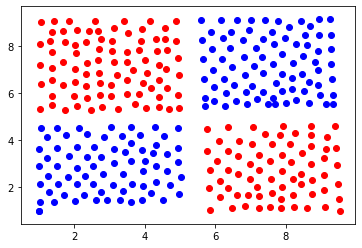

In [485]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.optimize import minimize


def plot_neural_network(data_class1, data_class2):
    
    data = np.vstack((data_class1, data_class2))
    xmin = np.amin(data[:,0])
    xmax = np.amax(data[:,0])
    ymin = np.amin(data[:,1])
    ymax = np.amax(data[:,1])

    xequispaced = np.linspace(xmin, xmax, 100)
    yequispaced = np.linspace(ymin, ymax, 100)

    xx, yy = np.meshgrid(xequispaced, yequispaced)

    grid_data = np.vstack((xx.flatten(), yy.flatten())).T
    
    parameters = weights_layer(Network_size, 2)
    
    label_mesh, memory = Forward_propagation_complete(X, parameters, Network_size) # use your forwardProp implementation

    prediction = np.array([np.argmax(activation) for activation in label_mesh])
    
    plt.scatter(data_class1[:,0], data_class1[:,1], c = 'r')
    plt.scatter(data_class2[:,0], data_class2[:,1], c='b')
    plt.show()
    
    prediction = clf.predict(grid_data)
    
    Z = prediction.reshape(xx.shape)
    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:2])

    plt.contourf(xx,yy,Z, alpha = 0.1, cmap=cmap)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

    plt.scatter(data_class1[:,0], data_class1[:,1], c = 'r')
    plt.scatter(data_class2[:,0], data_class2[:,1], c='b')
    plt.show()
    
    return

plot_neural_network(data_class1, data_class2)

### Reach out if Something is unclear
## PDF is attached 
# End of Code